<a href="https://colab.research.google.com/github/armanut86/arman/blob/master/HW1_neldermead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notebook for HW1 of the optimization methods by Arman Alahyari
The results are already present in here, However, for rerunning the cells need to run in order begining from the import cell.

Importing whatever is needed:

In [210]:
#import block
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D   
from numpy import linalg as LNG 
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy import optimize

# Nelder-Mead

**Functions**

Nelder-Mead appraoch implementation for Mishara's Bird Function:

In [17]:
def f(x):
  out=np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
  return out;

In [18]:
# get the values of B, G, W
def BGW(x1,x2,x3):
  inpit_list=np.array([x1,x2,x3])
  evalf=np.array([f(x1),f(x2),f(x3)])
  insorted=np.argsort(evalf)
  outs=[inpit_list[i] for i in insorted]
  return outs[0],outs[1],outs[2]
##################################
def contplot(f):
  delta = 0.05
  x = np.arange(-10,0, delta)
  y = np.arange(-10,0, delta)
  X, Y = np.meshgrid(x, y)
  Z=f([X,Y])
  fig, ax = plt.subplots(figsize=(10, 8))
  CS = ax.contour(X, Y, Z)
  ax.set_title('Plot')
  return;
####################################
def triplot(s1,s2,s3):
  pts = np.array([s1,s2,s3])
  p = Polygon(pts,facecolor='None',edgecolor='red')
  ax = plt.gca()
  ax.add_patch(p)
  return;
######################################
def line2(a1,a2):
    l=Line2D(a1,a2,color='red')
    ax = plt.gca()
    ax.add_line(l)
#############################evaluation of R, C,E
def calR(B,G,W,alpha=1):
  M=(B+G)/2
  R= M + alpha*(M-W)
  return R,M;
def calE(R,M,gamma=1):
  E= R+gamma*(R-M) 
  return E;
def calC2(C1,W,beta=1):
  C2= C1 + (1/beta)*(C1-W)
  return C2;
##########################
###########################
def eps(B,G,W):
  eps=np.abs(f(B)-f(W))
  return eps;
###########################projection if needed
def project(a):
  if ((a[0]+5)**2+(a[1]+5)**2)>25:
    vxa=a[0]-(-5)
    vya=a[1]-(-5)
    magv=np.sqrt(vxa**2+vya**2)
    ao=np.zeros_like(a)
    ao[0]=-5+(vxa/magv)*5
    ao[1]=-5+(vya/magv)*5
  else:
    ao=a
  return ao;

Defining the initial values:

Constrained version:
$$(x+5)^2+(y+5)^2<25$$

In [225]:
#initializations
#the ones used for Q3.1:
s1=[-4,-6] 
s2=[-6,-9]
s3=[-5,-4]
#for q3.2
# s1=[-8,-6] 
# s2=[-8,-4]
# s3=[-9,-5] or
# s1=[-4,-8] 
# s2=[-3,-7]
# s3=[-3,-9]
# s1=[-4,-8] 
# s2=[-6,-5]
# s3=[-6,-8]
# s1=[-8,-6] 
# s2=[-8,-4]
# s3=[-9,-5]
B,G,W=BGW(s1,s2,s3) #collect f-B<G<W
# beta=.5
# gamma=2
# alpha=3
beta=2
gamma=0.5
alpha=1

setp by step

In [ ]:
#@title
# #@title
# #step by step  the alg
# contplot(f)
# fb=[];
# i=0
# R,M=calR(B,G,W,1)
# fb.append(f(B))
# # line2(R,W)
# if f(R)<f(G):
#   if f(R)>f(B):
#     print("1")
#     W=project(R) 
#   else:
#     E=calE(R,M,gamma)
#     if f(E)< f(B):
#       print("2")
#       W=project(E)
#     else:
#       print("3")
#       W=project(R)
# elif f(R)<f(W):
#   print("4")
#   W=project(R)
# else:
#   C1=(M + W)/2
#   if f(C1)<f(W):
#     C2=calC2(C1,W,beta)
#     if f(C2)<f(W):
#       print("5")
#       W=C2
#     else:
#       print("6")
#       W=C1
#   else:
#     print("7")
#     G=M
#     W=(W+B)/2
#   i=i+1
# B,G,W=BGW(B,G,W)
# triplot(B,G,W)

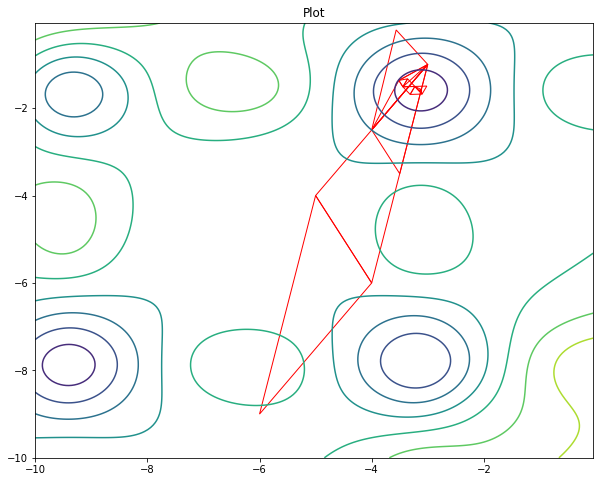

In [226]:
contplot(f)
fb=[]
i=0
#Nelder-Mead implementation
while(eps(B,G,W)>0.0001 and i<100):
  B,G,W=BGW(B,G,W) # calculate the order of points
  triplot(B,G,W) #plotting the triangle
  R,M=calR(B,G,W,alpha) #calculating R and M
  fb.append(f(B))
  # line2(R,W)
  if f(R)<f(G):
    if f(R)>f(B):
      W=project(R)  
    else:
      E=calE(R,M,gamma)
      if f(E)< f(B):
        W=project(E)
      else:
        W=project(R)
  elif f(R)<f(W):
    W=project(R)
  else:
    C1=(M + W)/2
    if f(C1)<f(W):
      C2=calC2(C1,W,beta)
      if f(C2)<f(W):
        W=C2
      else:
        W=C1
    else:
      G=M
      W=(W+B)/2
  i=i+1

In [228]:
# fig = plt.figure()
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# ax.plot(range(21),fb)
# xlimit=[0,20]
# ax.set_xticks(range(21))
# ax.set_xlabel('iterations')
# ax.set_ylabel('f')

# Cordinate Descent

Functions:

In [27]:
#functions only depending x or y 
def fx(x):
  outx=np.sin(y)*np.exp(1-np.cos(x))**2+np.cos(x)*np.exp(1-np.sin(y))**2+(x-y)**2
  return outx;
def fy(y):
  outy=np.sin(y)*np.exp(1-np.cos(x))**2+np.cos(x)*np.exp(1-np.sin(y))**2+(x-y)**2
  return outy;
def boun(a):          
  M=np.sqrt(25-(a+5)**2) #calculating the bounds accring to the fixed variable and the constraint
  lb=-M-5
  ub=M-5
  return lb,ub;
def f(x):
  out=np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
  return out;
def contplot(f):
  delta = 0.05
  x = np.arange(-10,0, delta)
  y = np.arange(-10,0, delta)
  X, Y = np.meshgrid(x, y)
  Z=f([X,Y])
  fig, ax = plt.subplots(figsize=(10, 8))
  CS = ax.contour(X, Y, Z)
  ax.set_title('Plot')
  return;

In [231]:
#initializtion
# x=-1
# y=-2
x=-5
y=-4
i=0
err=100

4.632283034430586
3.3625434741628766
3.30337989817485
3.30337989817485
28.131366951078896
-29.574890937238806
-29.574890937238806
-106.4063304745612
-106.78768878805529
-106.78768878805529
-106.78773368084397
-106.78773368600713


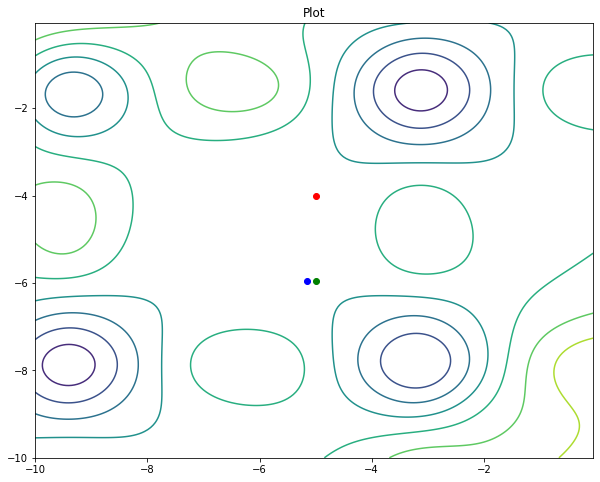

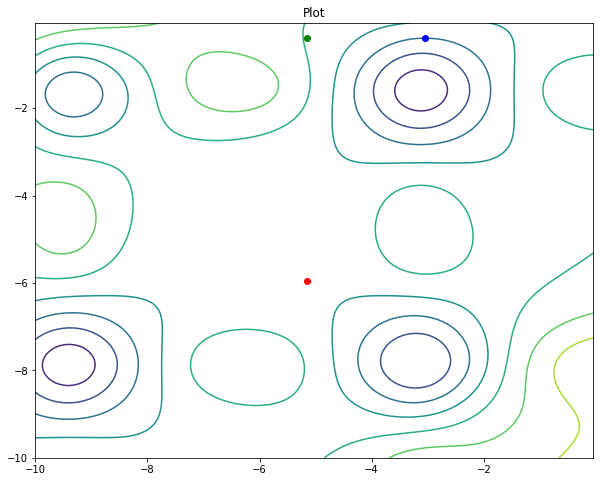

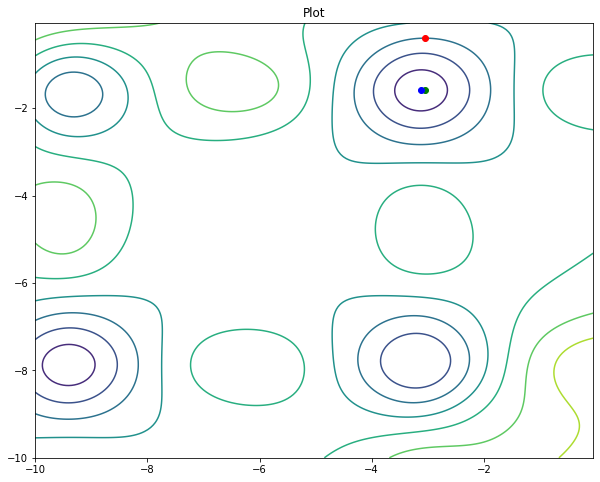

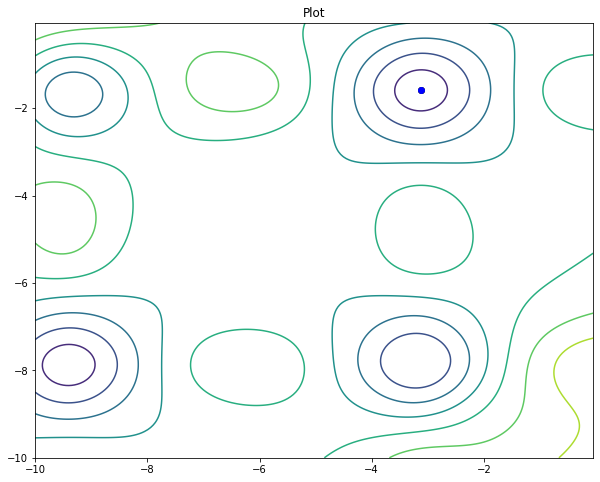

In [232]:
#perform cordinate descent
while(err>0.0001 and i<100):
  contplot(f)
  plt.plot(x,y,'ro') #plot the points
  f1=f([x,y])
  print(f1)
  lb,ub=boun(x) #similar process this time with y
  res = minimize_scalar(fy, method='Brent') #solve univariate minimization
  if lb<res.x<ub:
    y=res.x
  else:
    y = optimize.fminbound(fy, lb, ub) #minimization with repect to y
    ya = optimize.fminbound(fy, lb+2, ub) 
    if fy(ya)<fy(y):
      y=ya
  fm=f([x,y])
  plt.plot(x,y,'go')
  print(fm)
  lb,ub=boun(y)    #considering the constraints calculte the bounds
  resa = minimize_scalar(fx, method='Brent')
  if lb<resa.x<ub:
    x=resa.x
  else:
    x = optimize.fminbound(fx, lb, ub) #minimization with repect to x
    xa = optimize.fminbound(fx, lb+2, ub) 
    if fx(xa)<fx(x):
      x=xa 
  f2=f([x,y])
  print(f2)
  plt.plot(x,y,'bo') 
  err=np.abs(f2-f1)
  i=i+1

step by step

In [ ]:
#@title
# contplot(f)
# plt.plot(x,y,'ro') 
# f1=f([x,y])
# print(f1)
# lb,ub=boun(x) #similar process this time with y
# res = minimize_scalar(fy, method='Brent')
# if lb<res.x<ub:
#   y=res.x
# else:
#   y = optimize.fminbound(fy, lb, ub) #minimization with repect to y
#   ya = optimize.fminbound(fy, lb+2, ub) #minimization with repect to y
#   if fy(ya)<fy(y):
#     y=ya
# fm=f([x,y])
# plt.plot(x,y,'go')
# print(fm)
# lb,ub=boun(y)    #considering the constraints calculte the bounds
# resa = minimize_scalar(fx, method='Brent')
# if lb<resa.x<ub:
#   x=resa.x
# else:
#   x = optimize.fminbound(fx, lb, ub) #minimization with repect to y
#   xa = optimize.fminbound(fx, lb+2, ub) #minimization with repect to y
#   if fx(xa)<fx(x):
#     x=xa #minimization with repect to x
# f2=f([x,y])
# print(f2)
# plt.plot(x,y,'bo') 
# err=np.abs(f2-f1)
# i=i+1